# COMS 4995: Applied ML Final Project
### Life Expectancy Prediction with WHO data
Eshan Kumar (ek3227), Victoria Edwards (ve2172), Siddhant Rajeev Kumar (sk4975), Aayush Kumar Verma (av2955)


In [ ]:
# You need to create a new API token to do this with your Kaggle account and upload the json file that's generated to Colab.
# After doing this, run the following commands to load the dataset.
# Otherwise, simply download the dataset from Kaggle and upload to Colab.

"""
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download kumarajarshi/life-expectancy-who
! unzip life-expectancy-who
"""

'\n! pip install kaggle\n! mkdir ~/.kaggle\n! cp kaggle.json ~/.kaggle/\n! chmod 600 ~/.kaggle/kaggle.json\n! kaggle datasets download kumarajarshi/life-expectancy-who\n! unzip life-expectancy-who\n'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#The Dataset
[Kaggle Link](https://www.kaggle.com/kumarajarshi/life-expectancy-who)

The goal is to predict Life expectancy of an individual based on multiple factors.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Comment out and replace this if you need to (Eg. if you have it downloaded on your computer)
lifeDF = pd.read_csv('/content/drive/MyDrive/Applied ML Project/Life Expectancy Data.csv')

In [ ]:
target = "Life expectancy "
cat_ft = ['Country', 'Status']
num_ft = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

print("Datset Features:")
for col in lifeDF.columns:
  if str(col)==target:
    print("\t- "+str(col)+" (Target)")
    continue
  print("\t- "+str(col))
print(lifeDF.shape)
display(lifeDF.head(5))

Datset Features:
	- Country
	- Year
	- Status
	- Life expectancy  (Target)
	- Adult Mortality
	- infant deaths
	- Alcohol
	- percentage expenditure
	- Hepatitis B
	- Measles 
	-  BMI 
	- under-five deaths 
	- Polio
	- Total expenditure
	- Diphtheria 
	-  HIV/AIDS
	- GDP
	- Population
	-  thinness  1-19 years
	-  thinness 5-9 years
	- Income composition of resources
	- Schooling
(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#Data Cleaning/Preprocessing
First, missing data is identified. Then for some features, it is dropped. For the other features, we wish to impute them, but before that the categorical features are encoded, then the other missing data is imputed. 

There are (1289, 22) missing values
Percentage of N/A in:
Life expectancy                     0.340
Adult Mortality                     0.340
Alcohol                             6.603
Hepatitis B                         18.822
 BMI                                1.157
Polio                               0.647
Total expenditure                   7.692
Diphtheria                          0.647
GDP                                 15.248
Population                          22.192
 thinness  1-19 years               1.157
 thinness 5-9 years                 1.157
Income composition of resources     5.684
Schooling                           5.548


Text(0, 0.5, 'Percentage')

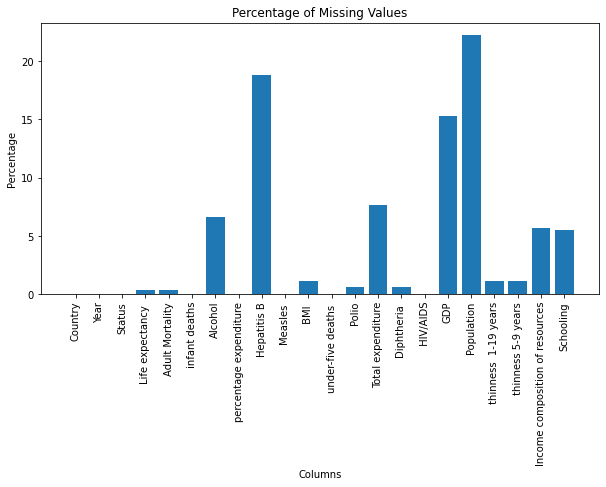

In [ ]:
missing_df = lifeDF.loc[lifeDF.isnull().any(axis=1)]
print("There are " + str(missing_df.shape) + " missing values")
nRows = len(lifeDF)
print("Percentage of N/A in:")

# Finding missing values and printing them
for column in lifeDF:
    nNull = lifeDF[column].isna().sum()
    percentNull = (float(nNull)/nRows)*100
    # If find Columns with null values, prints name of columns and percent null
    if nNull:
      print( '{:<35s} {:.3f}'.format(column, percentNull))
      #print("%s:\t\t%.3f" %(column, percentNull))

result = 100 - (lifeDF.count() * 100 / len(lifeDF))
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.bar(lifeDF.columns, result)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Percentage of Missing Values')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')

In [ ]:
# For some columns with low percentages of N/A, we will simply drop these rows. 
missing = []
ft_to_drop = []
for column in lifeDF:
    nNull = lifeDF[column].isna().sum()
    percentNull = (float(nNull)/nRows)*100
    if nNull:
      if percentNull < 1: # Low percentage N/A
        ft_to_drop.append(column)
      else:
        missing.append((column, nNull))

print("Dropping data if N/A in:\t"+ str(ft_to_drop))
filt_lifeDF = lifeDF.dropna(subset=ft_to_drop)
print(f"Dropped {len(lifeDF) - len(filt_lifeDF)} out of {len(lifeDF)} rows, {len(filt_lifeDF)} rows remain")

#For columns with more missing data, we will impute them in order of least N/A to most N/A
missing.sort(key=lambda i:i[1])
ft_to_impute = [x[0] for x in missing]
print("Imputing data if N/A in:\t"+ str(ft_to_impute))

filt_lifeDF.reset_index(drop=True, inplace = True)
#However, first, we must encode the categorical features

Dropping data if N/A in:	['Life expectancy ', 'Adult Mortality', 'Polio', 'Diphtheria ']
Dropped 29 out of 2938 rows, 2909 rows remain
Imputing data if N/A in:	[' BMI ', ' thinness  1-19 years', ' thinness 5-9 years', 'Schooling', 'Income composition of resources', 'Alcohol', 'Total expenditure', 'GDP', 'Hepatitis B', 'Population']


# Encoding categorical variables

At first, we one-hot encoded categorical variables (Country, Status). When we did this, we found that the features deemed important by Linear Regression were the same as those found in the initial data exploration, so they were not that interesting. Therefore, we decided to instead label-encode these variables.

In [ ]:
"""
#Country and Status can be one hot encoded
cat_df = filt_lifeDF[cat_ft]

cat_df_one_hot = pd.get_dummies(cat_df, dummy_na = False)
transformed_filt_lifeDF = filt_lifeDF.drop(columns=cat_ft)
transformed_filt_lifeDF = transformed_filt_lifeDF.join(cat_df_one_hot)
print("Shape of data before one-hot encoding:\t" + str(filt_lifeDF.shape))
print("Shape of data after one-hot encoding:\t" + str(transformed_filt_lifeDF.shape))
transformed_filt_lifeDF


"""
#Country and Status can be label encoded
from sklearn.preprocessing import LabelEncoder
transformed_filt_lifeDF = filt_lifeDF.copy()
for feature in cat_ft:
  le = LabelEncoder()
  transformed_filt_lifeDF [feature] = le.fit_transform(transformed_filt_lifeDF [feature])
  transformed_filt_lifeDF [feature].astype("int64")

print("Shape of data before label encoding:\t" + str(filt_lifeDF.shape))
print("Shape of data after label encoding:\t" + str(transformed_filt_lifeDF.shape))
transformed_filt_lifeDF

Shape of data before label encoding:	(2909, 22)
Shape of data after label encoding:	(2909, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,182,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2905,182,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2906,182,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2907,182,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


##Imputing Missing values:
There are a few ways to impute missing values. In previous assignments, we used simple, univariate impute (sklearn.impute.SimpleImputer). There are also more sophisticated data imputers, which we will try and compare below. These include:
- [Iterative Imputer](https://scikit-learn.org/stable/modules/impute.html) - multivariate imputation
- [KNN Imputer](https://scikit-learn.org/stable/modules/impute.html) - K nearest neighbors imputation
- [Stoachastic Regression imputation](https://henrikhain.io/post/stochastic-regression-imputation/)

We will show the result of these imputations on a specific data point, where the BMI and Alcohol are both NaN, but will be imputed. 

In [ ]:
iterImpute = transformed_filt_lifeDF.copy()
kNNImpute = transformed_filt_lifeDF.copy()
stochImpute = transformed_filt_lifeDF.copy()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Iterative imputation - built in sklearn imputer
# To show that it is working, we can first display a specifically chosen row with NaN in BMI/Alcohol before and after imputation
display(iterImpute.loc[[2394]])
lifeDF_imputed_arr = imputer.fit_transform(iterImpute)
iterImpute = pd.DataFrame(lifeDF_imputed_arr, columns = iterImpute.columns)
display(iterImpute.loc[[2394]])

missing_df = iterImpute.loc[iterImpute.isnull().any(axis=1)]
print("There are " + str(missing_df.shape) + " remaining missing values")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2394,150,2015,1,57.3,332.0,26,NaN,0.0,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2394,150.0,2015.0,1.0,57.3,332.0,26.0,-0.509588,0.0,31.0,878.0,...,41.0,5.065393,31.0,3.4,758.725782,11882136.0,5.716464,5.951113,0.421,4.9


There are (0, 22) remaining missing values


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")

# KNN imputation - built in sklearn imputer
# To show that it is working, we can first display a specifically chosen row with NaN in BMI/Alcohol before and after imputation
display(kNNImpute.loc[[2394]])
lifeDF_imputed_arr = imputer.fit_transform(kNNImpute)
kNNImpute = pd.DataFrame(lifeDF_imputed_arr, columns = kNNImpute.columns)
display(kNNImpute.loc[[2394]])

missing_df = kNNImpute.loc[kNNImpute.isnull().any(axis=1)]
print("There are " + str(missing_df.shape) + " remaining missing values")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2394,150,2015,1,57.3,332.0,26,NaN,0.0,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2394,150.0,2015.0,1.0,57.3,332.0,26.0,0.095,0.0,31.0,878.0,...,41.0,5.44,31.0,3.4,758.725782,11882136.0,8.45,8.3,0.421,4.9


There are (0, 22) remaining missing values


In [ ]:
#Stochastic Regression imputation - now we can iterate over all columns to be imputed and impute one by one
# To show that it is working, we can first display a specifically chosen row with NaN in BMI before and after imputation
display(stochImpute.loc[[2394]])

for col_impute in ft_to_impute:
  observed = stochImpute.dropna(subset=[col_impute])
  missingIdx = np.where(stochImpute[col_impute].isnull())[0]
  missing = stochImpute.loc[stochImpute[col_impute].isnull()]

  lrg = LinearRegression()
  lrg.fit(observed.index.values.reshape(-1, 1), observed[col_impute].values)
  imputations = lrg.predict(missing.index.values.reshape(-1, 1))

  # Calculate residuals, variance and noise vector from residual distr.
  residuals = observed[col_impute].values - lrg.predict(observed.index.values.reshape(-1, 1))
  variance = residuals.var()
  rnoise = np.random.normal(0,np.sqrt(variance), len(imputations))

  # Add noise vector to predicton vector from regression model.
  simputations = imputations + rnoise

  res = dict(zip(missingIdx, simputations))
  stochImpute[col_impute] = stochImpute[col_impute].fillna(res)

display(stochImpute.loc[[2394]])

missing_df = stochImpute.loc[stochImpute.isnull().any(axis=1)]
print("There are " + str(missing_df.shape) + " remaining missing values")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2394,150,2015,1,57.3,332.0,26,NaN,0.0,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2394,150,2015,1,57.3,332.0,26,7.95743,0.0,31.0,878,...,41.0,3.533648,31.0,3.4,758.725782,11882136.0,5.066226,3.497163,0.421,4.9


There are (0, 22) remaining missing values


We decided that iterative imputation resulted in values that seemed the most reasonable, so we chose this.

In [ ]:
dataDF = iterImpute
display(iterImpute.head(2000))
print(len(dataDF))

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,2015.0,1.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.0,2014.0,1.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,2013.0,1.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.0,2012.0,1.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.0,2011.0,1.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,125.0,2014.0,1.0,75.3,125.0,8.0,0.01,973.728675,88.0,0.0,...,78.0,5.47,88.0,0.1,6491.524500,3973354.0,1.1,1.1,0.735,13.4
1996,125.0,2013.0,1.0,75.3,125.0,8.0,5.38,946.652117,88.0,0.0,...,71.0,5.23,88.0,0.1,6583.116248,3565716.0,1.1,1.1,0.731,13.4
1997,125.0,2012.0,1.0,74.9,129.0,9.0,5.14,885.985819,95.0,0.0,...,94.0,5.18,95.0,0.1,6387.785281,3158966.0,1.1,1.1,0.725,13.4
1998,125.0,2011.0,1.0,74.5,133.0,9.0,4.83,759.538070,91.0,0.0,...,91.0,4.93,91.0,0.2,5771.565878,29759989.0,1.1,1.1,0.721,13.4


2909


# Visualizing the data

Here, we create scatterplots of various numerical features and life expectancy. Some features appear to have a positive correlation with the target variable

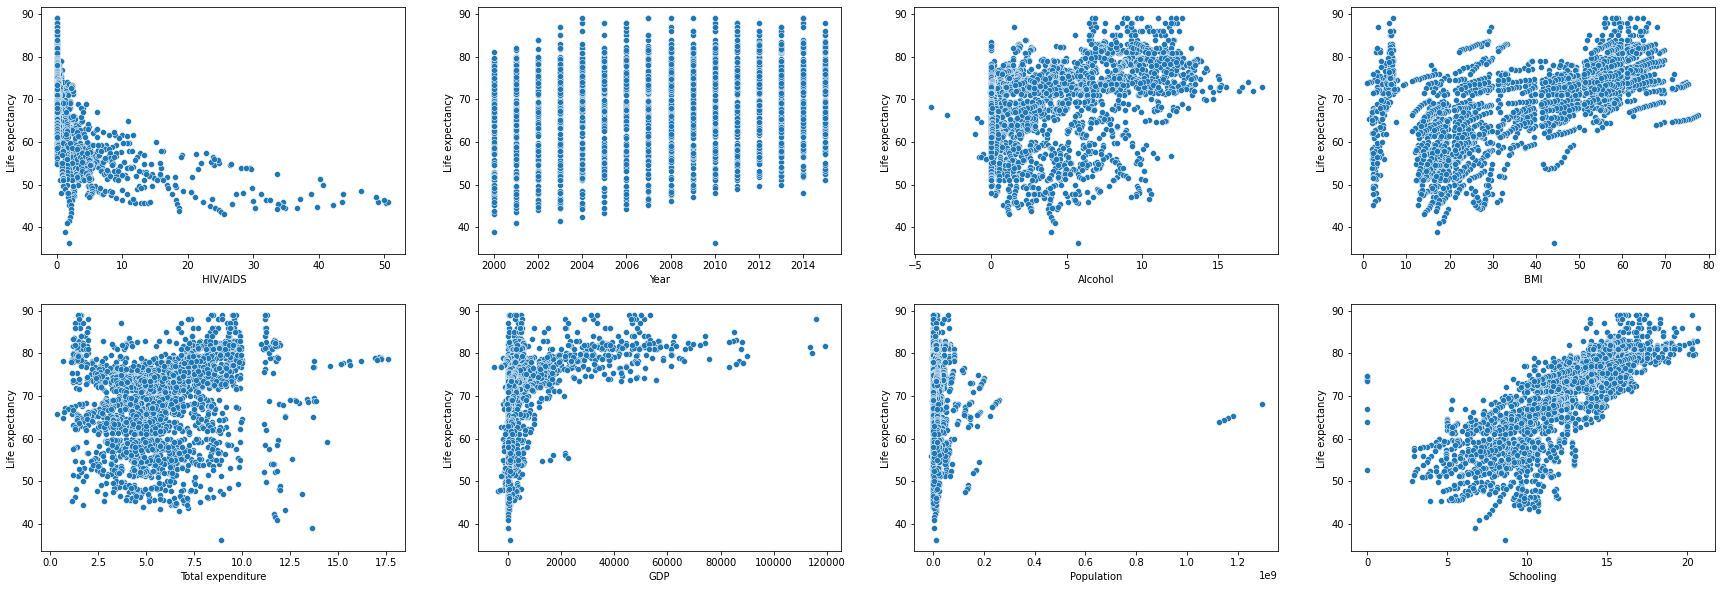

In [ ]:
x = dataDF.drop(columns=['Life expectancy '])
data_y = dataDF['Life expectancy ']
fig, ax = plt.subplots(2,4, figsize=(30,10))
for var, subplot in zip([' HIV/AIDS', 'Year', 'Alcohol', ' BMI ', 'Total expenditure', 'GDP', 'Population', 'Schooling'], ax.flatten()):
    sns.scatterplot(x=var, y=data_y, data=x, ax=subplot)

### Histograms of numerical features

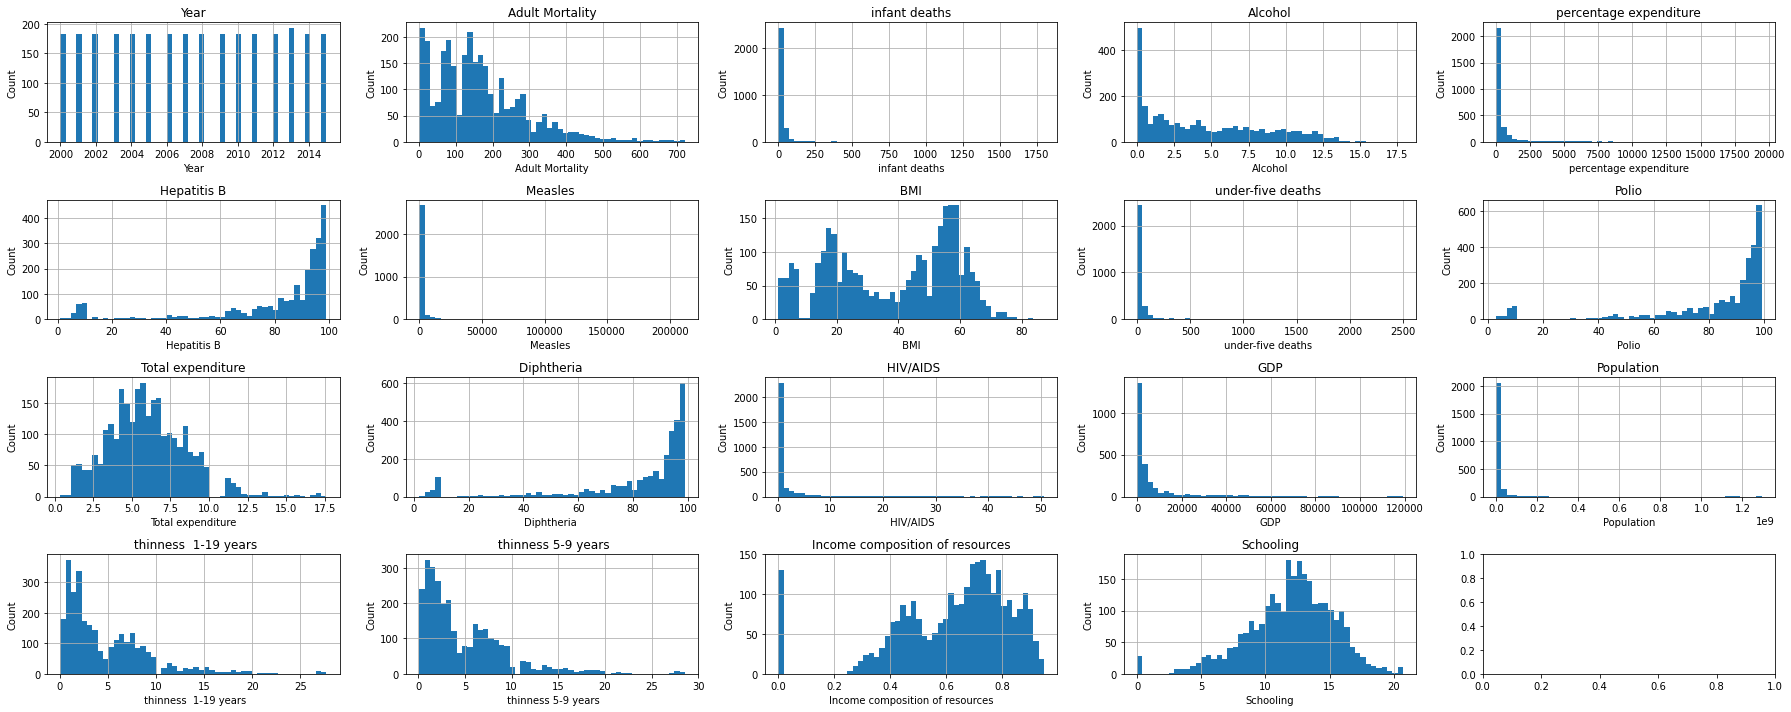

In [ ]:
fig, ax = plt.subplots(4,5, figsize=(25,10))
for feature, subplot in zip(num_ft, ax.flatten()):
  lifeDF[feature].hist(bins=50, ax=subplot)
  subplot.set_xlabel(feature)
  subplot.set_ylabel("Count")
  subplot.set_title(feature)
fig.tight_layout()
plt.show()

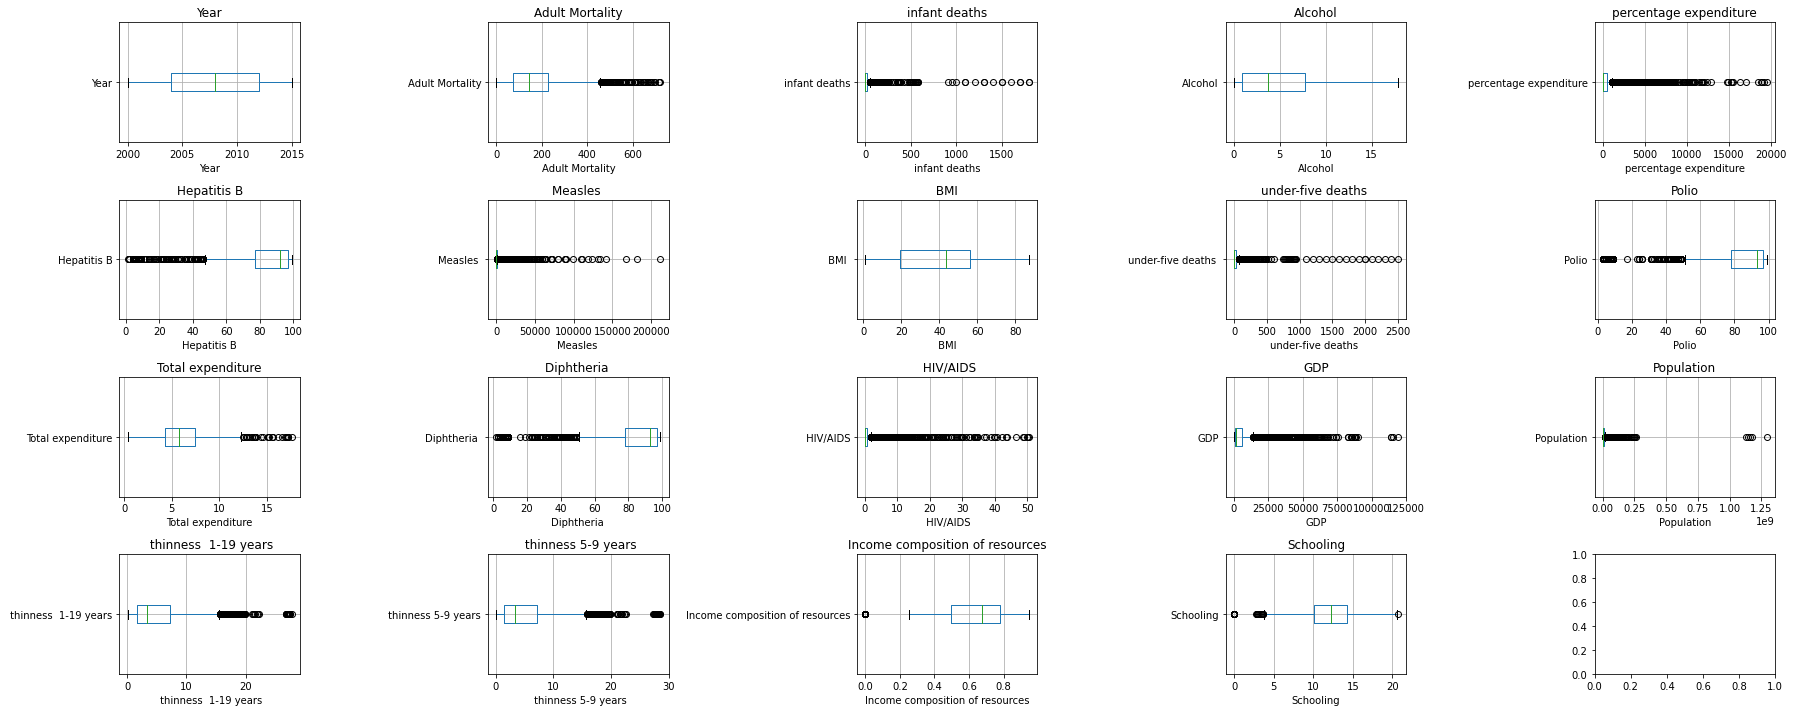

In [ ]:
fig, ax = plt.subplots(4,5, figsize=(25,10))
for feature, subplot in zip(num_ft, ax.flatten()):
  lifeDF.boxplot(column = feature, ax=subplot, vert=False)
  subplot.set_xlabel(feature)
  subplot.set_title(feature)
fig.tight_layout()
plt.show()

### Plotting categorical features

In [ ]:
bottom= lifeDF.groupby('Country', as_index=False)['Life expectancy '].mean().sort_values('Life expectancy ').head(30).sort_values('Life expectancy ')
top = lifeDF.groupby('Country', as_index=False)['Life expectancy '].mean().sort_values('Life expectancy ', ascending=False).head(30).sort_values('Life expectancy ')

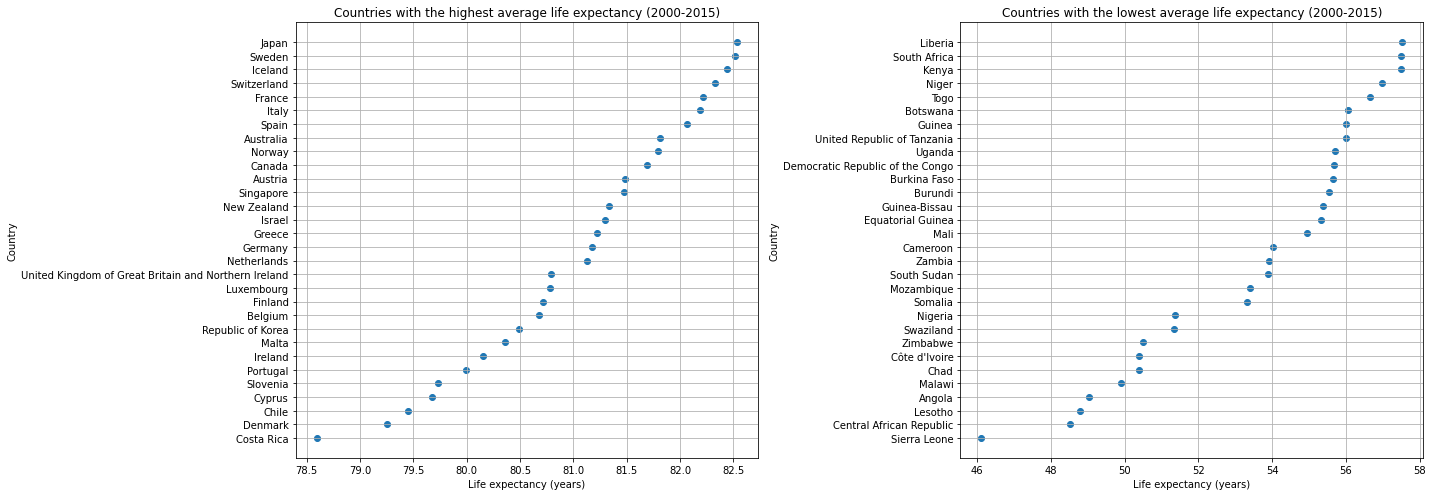

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 7)
ax[0].scatter(top['Life expectancy '],top['Country'])
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Countries with the highest average life expectancy (2000-2015)')
ax[0].grid(axis = 'x')
ax[0].grid(axis = 'y')
ax[0].tick_params('x', labelrotation=360) 
ax[0].set_xlabel('Life expectancy (years)')
ax[0].set_ylabel('Country')
ax[1].scatter(bottom['Life expectancy '],bottom['Country'])
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Countries with the lowest average life expectancy (2000-2015)')
ax[1].grid(axis = 'x')
ax[1].grid(axis = 'y')
ax[1].tick_params('x', labelrotation=360) 
ax[1].set_xlabel('Life expectancy (years)')
ax[1].set_ylabel('Country')
fig.tight_layout()
plt.show()

Text(0, 0.5, 'Development status')

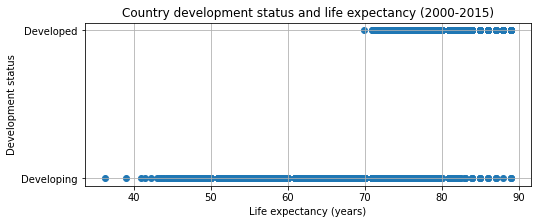

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
ax.scatter(lifeDF['Life expectancy '], lifeDF['Status'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('Country development status and life expectancy (2000-2015)')
ax.grid(axis = 'x')
ax.grid(axis = 'y')
ax.tick_params('x', labelrotation=360) 
ax.set_xlabel('Life expectancy (years)')
ax.set_ylabel('Development status')

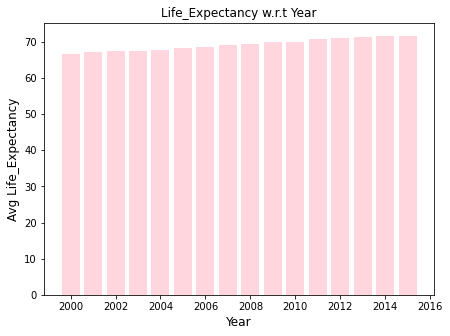

In [ ]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(lifeDF.groupby('Year')['Year'].count().index,lifeDF.groupby('Year')['Life expectancy '].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

In [ ]:
data = lifeDF.copy()
y= data["Life expectancy "]
df =  data.drop(["Life expectancy "], axis=1)

categorical= df.select_dtypes(include= "O")
numerical= df.select_dtypes(exclude= "O")

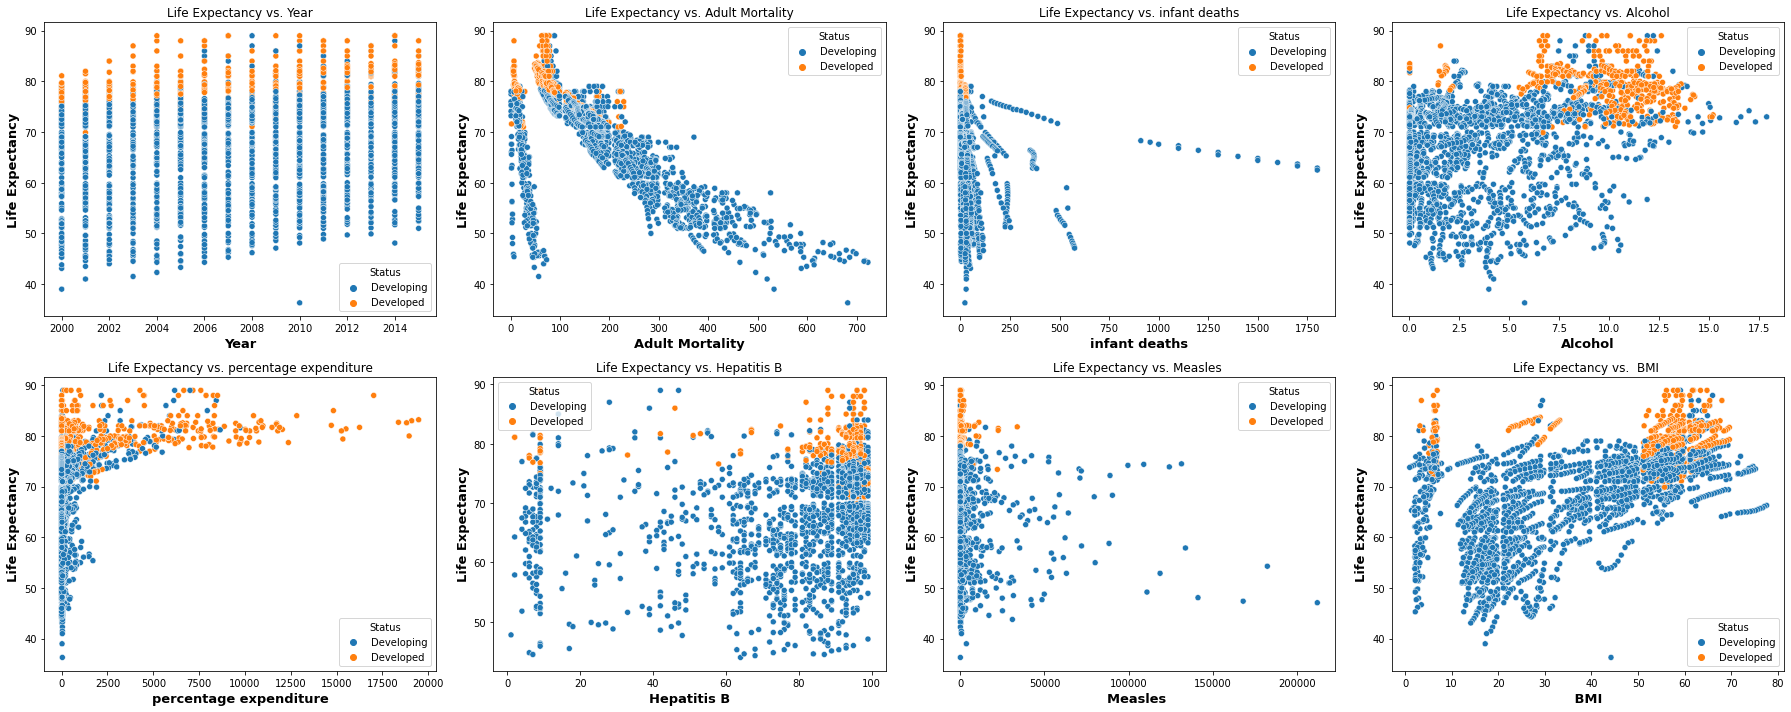

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(25,10))
for feature, subplot in zip(numerical.columns, ax.flatten()):
  sns.scatterplot(x = numerical[feature], y = y, hue = categorical.Status, ax=subplot)
  subplot.set_xlabel(feature, fontsize=13, fontweight="bold")
  subplot.set_ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
  subplot.set_title("Life Expectancy vs. " + feature)
fig.tight_layout()
plt.show()

# Processing Correlated features

We can see from the correlation matrix that several features are highly correlated. We choose to drop features with correlation >= 0.9. Therefore, we will drop "GDP", "thinness 5-9 years", and "infant deaths".

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


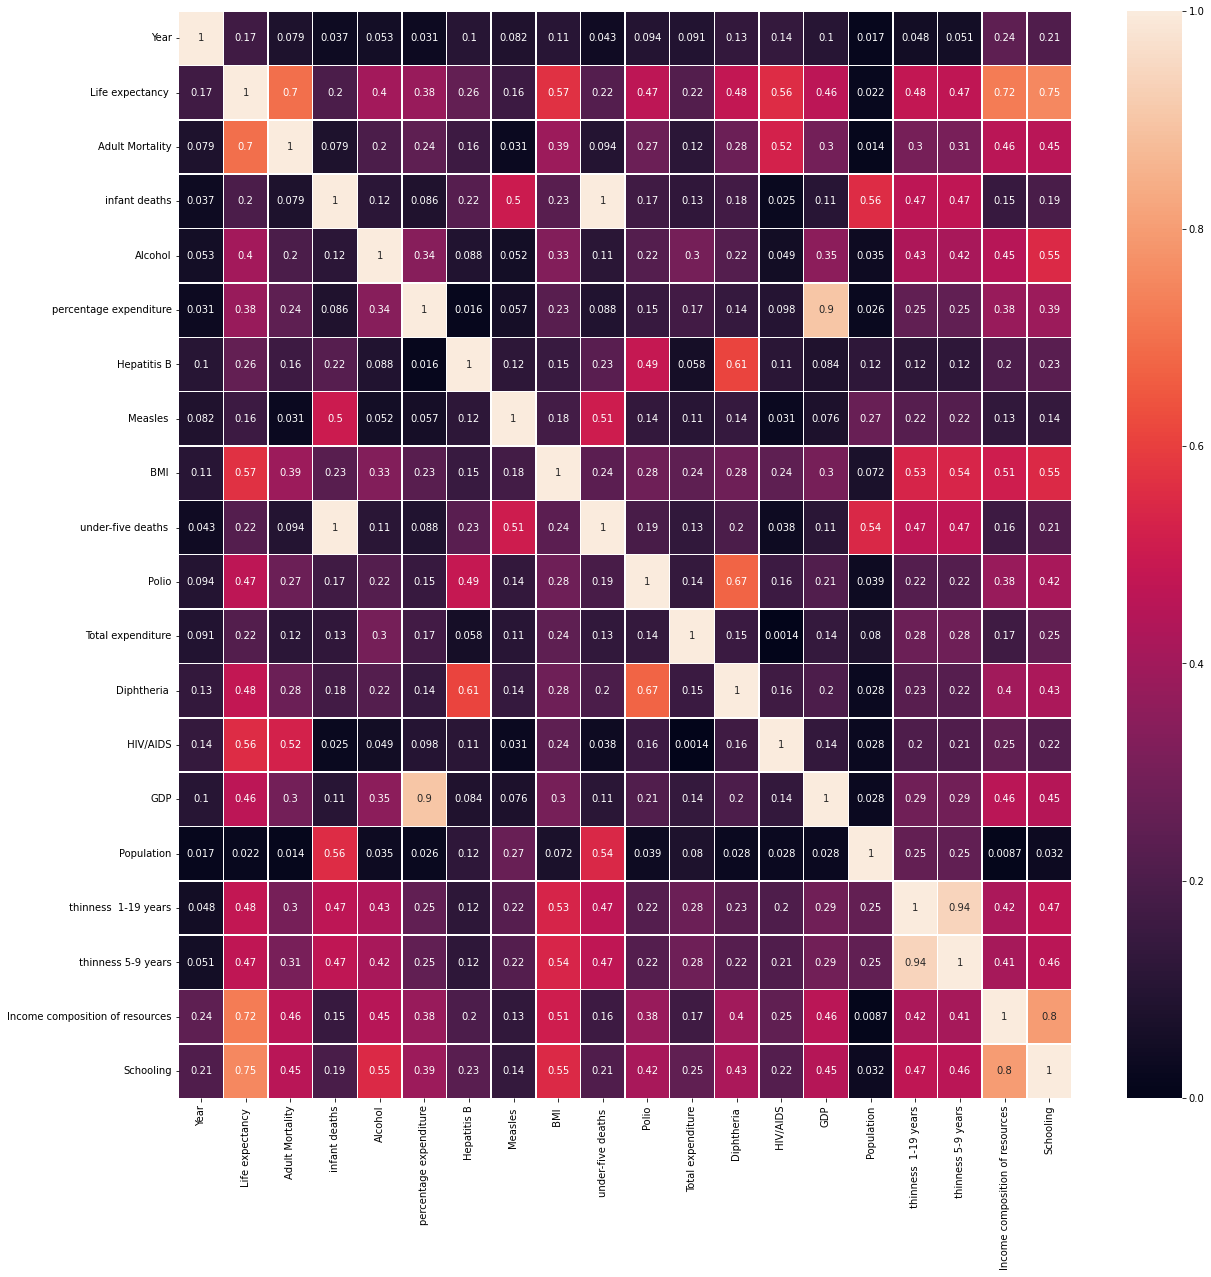

In [ ]:
corr_mat = lifeDF.corr().abs()
top_left = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool)) 
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot= True, vmin= 0, linewidth=0.5)

In [ ]:
#ft_to_drop = ['GDP', ' thinness 5-9 years', 'infant deaths', 'Life expectancy ']
ft_to_drop = ['GDP', ' thinness 5-9 years', 'infant deaths', 'Population', 'Life expectancy ']
num_ft = [x for x in num_ft if x not in ft_to_drop]
data_X = dataDF.drop(columns=ft_to_drop)
data_y = dataDF['Life expectancy ']

In [ ]:
data_X

,Country,Year,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling
0,0.0,2015.0,1.0,263.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,17.2,0.479,10.1
1,0.0,2014.0,1.0,271.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,17.5,0.476,10.0
2,0.0,2013.0,1.0,268.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,17.7,0.470,9.9
3,0.0,2012.0,1.0,272.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,17.9,0.463,9.8
4,0.0,2011.0,1.0,275.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,182.0,2004.0,1.0,723.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,7.13,65.0,33.6,9.4,0.407,9.2
2905,182.0,2003.0,1.0,715.0,4.06,0.000000,7.0,998.0,26.7,41.0,7.0,6.52,68.0,36.7,9.8,0.418,9.5
2906,182.0,2002.0,1.0,73.0,4.43,0.000000,73.0,304.0,26.3,40.0,73.0,6.53,71.0,39.8,1.2,0.427,10.0
2907,182.0,2001.0,1.0,686.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,6.16,75.0,42.1,1.6,0.427,9.8


# Split the data into development and test set
We chose to split the data 80% development, and 20% Test, because this is a common split percentage.

In [ ]:
from sklearn.model_selection import train_test_split
X_dev_raw, X_test_raw, y_dev, y_test = train_test_split(data_X, data_y, test_size = 0.2, random_state=42)
print("\nDevelopment-test split")
print("Shape of development data\nX_train:\t" + str(X_dev_raw.shape) + "\ny_train:\t" + str(y_dev.shape))
print("\nShape of test data\nX_test:\t" + str(X_test_raw.shape) + "\ny_test:\t" + str(y_test.shape))


Development-test split
Shape of development data
X_train:	(2327, 17)
y_train:	(2327,)

Shape of test data
X_test:	(582, 17)
y_test:	(582,)


In [ ]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_dev = X_dev_raw.copy()
X_test = X_test_raw.copy()
X_dev[num_ft] = scaler.fit_transform(X_dev[num_ft]) #fit and transform based on dev, but only transform for test
X_test[num_ft] = scaler.transform(X_test[num_ft])

In [ ]:
X_dev

,Country,Year,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling
1951,122.0,0.533393,1.0,-0.337075,0.598924,0.236197,0.612255,-0.206872,0.791999,-0.244436,0.530263,1.078126,0.491136,-0.321936,-0.641282,0.608517,0.218374
2807,176.0,-0.557297,1.0,0.232544,-0.695137,-0.355702,0.810060,-0.142394,-0.043707,-0.091160,0.700683,-0.320516,0.699598,-0.282428,-0.371741,-0.060448,-0.121701
2847,179.0,1.187807,1.0,-0.280113,-0.138390,-0.376195,-0.772380,-0.108625,-1.119617,-0.049893,0.445054,0.529396,-0.968099,-0.321936,2.121516,0.175657,0.063795
937,58.0,-0.339159,1.0,-0.581198,1.968221,2.529205,-1.563600,-0.203372,0.982160,-0.232646,0.700683,-1.797547,0.699598,-0.321936,-0.955747,1.169267,1.238599
1558,97.0,0.315255,1.0,0.737064,-0.913322,-0.339856,-0.060282,-0.206872,-1.039549,0.020850,-0.279230,-0.489673,-0.217635,-0.242919,0.639039,-0.650712,-0.740019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,102.0,0.315255,0.0,-0.817183,0.709270,-0.204874,0.295767,-0.206784,1.437545,-0.256227,-0.407044,1.007987,-0.384405,-0.321936,-0.910823,0.898730,0.713028
1095,68.0,0.097117,1.0,1.086973,-0.479461,-0.361743,-0.108937,-0.205822,-0.824367,-0.214960,-0.236625,0.252969,-0.217635,0.843573,0.818733,-1.152436,-1.018262
1130,70.0,-0.557297,1.0,-1.093855,0.255346,-0.356736,-2.378586,-0.206872,0.006335,-0.114741,-3.261572,-0.609320,-3.177796,0.428731,-0.102199,-0.886817,-1.203757
1294,80.0,-1.429850,0.0,-0.719534,1.288588,-0.374601,0.651816,-0.206872,0.867063,-0.238541,0.572868,0.917220,0.449443,-0.321936,-0.978209,0.962675,0.867608


# Model training/evaluation
We decided to try a few different models and vary some hyperparameters:
- Basic linear regression (baseline)
- Elastic-net linear regression
- Random Forest Regressor(Bagging)
- XGBoost Regressor (Boosting)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

## Linear Regression (baseline)

Default Linear Regression score on Training Set:	0.8326696473957855
Default Linear Regression score on Test Set:		0.8384974319713606


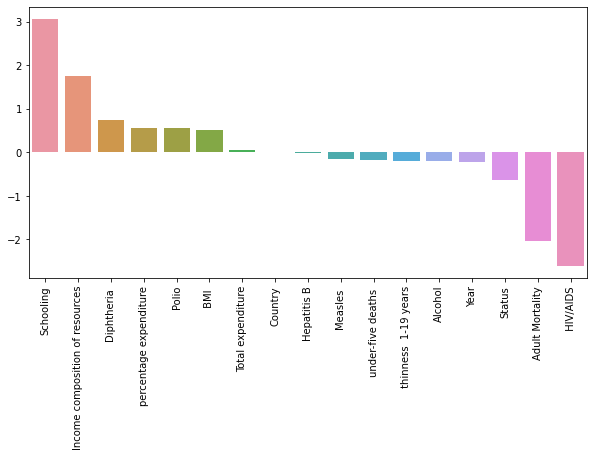

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
LR = LinearRegression()
LR.fit(X_dev, y_dev)
train_score = LR.score(X_dev, y_dev)
test_score = LR.score(X_test, y_test)
print(f"Default Linear Regression score on Training Set:\t{train_score}")
print(f"Default Linear Regression score on Test Set:\t\t{test_score}")
feature_names = list(X_dev.columns)
#feature_names.append("Bias Term") #messes up graph if included
fig = plt.figure(figsize = (10,5))
weights = list(LR.coef_)
#weights.append(LR.intercept_)

feat_imps = zip(feature_names, weights)

feats ,imps = zip(*(sorted(feat_imps, key = lambda x: x[1], reverse=True)))
ax=sns.barplot(list(feats)[:20], list(imps[:20]))
ax.tick_params(axis='x', rotation=90)


# Elastic Net

We do a randomized search with cross validation with 5 splits and search over the following Hyperparameters
- alpha
- L1 ratio

In [ ]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet()
EN.fit(X_dev, y_dev)
train_score = EN.score(X_dev, y_dev)
test_score = EN.score(X_test, y_test)
print(f"Default Elastic-Net Regression score on Training Set:\t{train_score}")
print(f"Default Elastic-Net Regression score on Test Set:\t{test_score}")

Default Elastic-Net Regression score on Training Set:	0.7931511392315803
Default Elastic-Net Regression score on Test Set:	0.7937087967202124


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

alphas = np.logspace(-2, 1, 10)
l1_ratios = [float(x) for x in np.linspace(0, 1, 11)]

#Grid searching with given hyperparameter space
pipe = make_pipeline(RandomizedSearchCV(ElasticNet(), param_distributions = {"alpha":alphas, "l1_ratio":l1_ratios}, cv=5, verbose=5, n_iter=50))
pipe.fit(X_dev, y_dev)
search_results = pipe.named_steps["randomizedsearchcv"]
print(f"Best Score:\t", search_results.best_score_)
print(f"Best Params:\t", search_results.best_params_)
print(f"\nPerformance score on test set with best hyperparameters = \t", pipe.score(X_test, y_test))
best_Enet = search_results.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END alpha=0.46415888336127775, l1_ratio=0.30000000000000004;, score=0.835 total time=   0.0s
[CV 2/5] END alpha=0.46415888336127775, l1_ratio=0.30000000000000004;, score=0.822 total time=   0.0s
[CV 3/5] END alpha=0.46415888336127775, l1_ratio=0.30000000000000004;, score=0.802 total time=   0.0s
[CV 4/5] END alpha=0.46415888336127775, l1_ratio=0.30000000000000004;, score=0.808 total time=   0.0s
[CV 5/5] END alpha=0.46415888336127775, l1_ratio=0.30000000000000004;, score=0.805 total time=   0.0s
[CV 1/5] END alpha=0.021544346900318832, l1_ratio=0.9;, score=0.846 total time=   0.0s
[CV 2/5] END alpha=0.021544346900318832, l1_ratio=0.9;, score=0.837 total time=   0.0s
[CV 3/5] END alpha=0.021544346900318832, l1_ratio=0.9;, score=0.816 total time=   0.0s
[CV 4/5] END alpha=0.021544346900318832, l1_ratio=0.9;, score=0.813 total time=   0.0s
[CV 5/5] END alpha=0.021544346900318832, l1_ratio=0.9;, score=0.822 total time= 

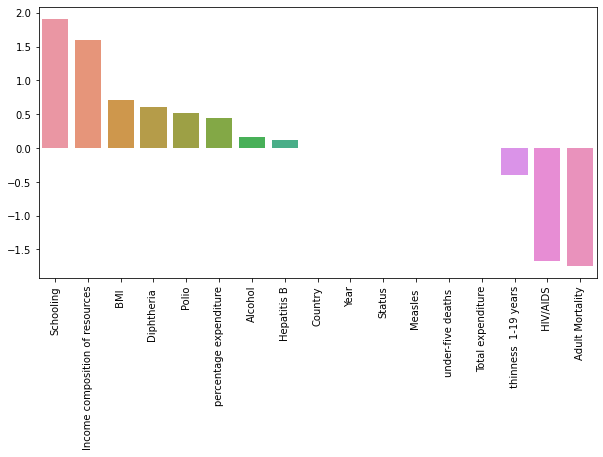

In [ ]:
feature_names = list(X_dev.columns)
fig = plt.figure(figsize = (10,5))
weights = list(EN.coef_)

feat_imps = zip(feature_names, weights)

feats ,imps = zip(*(sorted(feat_imps, key = lambda x: x[1], reverse=True)))
ax=sns.barplot(list(feats[:20]), list(imps[:20]))
ax.tick_params(axis='x', rotation=90)

# Random Forest Regressor (Bagging)

We do a randomized search with cross validation with 5 splits and search over the following Hyperparameters:
- max features
- depths
- estimators
- min_samples_splits 

We use early stopping to prevent overfitting rather than pruning. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit (X_dev, y_dev)
print ("Performance on Test data = ", rf.score (X_test, y_test))

Performance on Test data =  0.9630279032366051


In [ ]:
from sklearn.model_selection import cross_val_score

features = [2, 6, 10, 14, 17]
depths = [int(x) for x in np.linspace(5, 100, 15)]
estimators = [int(x) for x in np.linspace(50, 200, 4)]
min_samples_splits = [int(x) for x in np.linspace(2, 20, 4)]

pipe = make_pipeline(RandomizedSearchCV(RandomForestRegressor(random_state = 100, oob_score=True, warm_start=True), 
                                        param_distributions = {"max_features":features, "max_depth":depths, "n_estimators":estimators, "min_samples_split":min_samples_splits}, cv=5, verbose=5, n_iter=50))
pipe.fit(X_dev, y_dev)
search_results = pipe.named_steps["randomizedsearchcv"]
print(f"Best Score:\t", search_results.best_score_)
print(f"Best Params:\t", search_results.best_params_)
print(f"\nPerformance score on test set with best hyperparameters = \t", pipe.score(X_test, y_test))
best_RF = search_results.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=79, max_features=10, min_samples_split=20, n_estimators=50;, score=0.963 total time=   0.4s
[CV 2/5] END max_depth=79, max_features=10, min_samples_split=20, n_estimators=50;, score=0.944 total time=   0.4s
[CV 3/5] END max_depth=79, max_features=10, min_samples_split=20, n_estimators=50;, score=0.938 total time=   0.4s
[CV 4/5] END max_depth=79, max_features=10, min_samples_split=20, n_estimators=50;, score=0.960 total time=   0.4s
[CV 5/5] END max_depth=79, max_features=10, min_samples_split=20, n_estimators=50;, score=0.956 total time=   0.4s
[CV 1/5] END max_depth=45, max_features=6, min_samples_split=14, n_estimators=200;, score=0.963 total time=   1.2s
[CV 2/5] END max_depth=45, max_features=6, min_samples_split=14, n_estimators=200;, score=0.948 total time=   1.2s
[CV 3/5] END max_depth=45, max_features=6, min_samples_split=14, n_estimators=200;, score=0.941 total time=   1.2s
[CV 4/5] END max_d

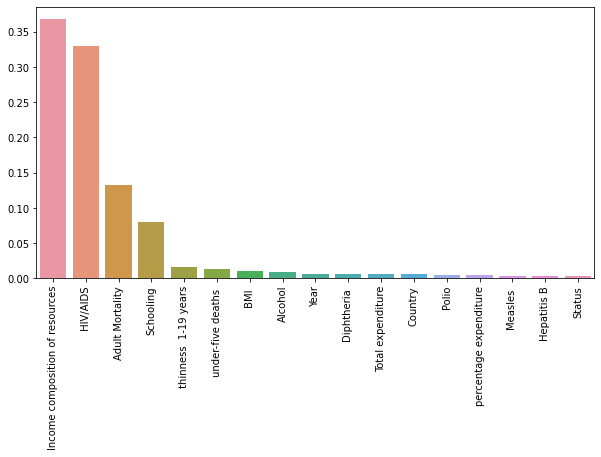

In [ ]:
fig = plt.figure(figsize = (10,5))
weights = list(best_RF.feature_importances_)

feat_imps = zip(feature_names, weights)

feats ,imps = zip(*(sorted(feat_imps, key = lambda x: x[1], reverse=True)))
ax=sns.barplot(list(feats[:20]), list(imps[:20]))
ax.tick_params(axis='x', rotation=90)

# Gradient Boosting Regressor (XGBResgressor)


We do a randomized search with cross validation with 5 splits and search over the following Hyperparameters:
- learning rates
- estimators
- depths


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit (X_dev, y_dev)
print ("Performance on Test data = ", xgb.score (X_test, y_test))

[02:58:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Performance on Test data =  0.9465410592944553


In [ ]:
estimators = [int(x) for x in np.linspace(50, 200, 4)]
learning_rates = np.logspace(-5, 1, 10)
depths = [int(x) for x in np.linspace(5, 100, 15)]

pipe = make_pipeline(RandomizedSearchCV(XGBRegressor(random_state = 100), 
                                        param_distributions = {"n_estimators":estimators, "eta":learning_rates,"max_depth":depths}, cv=5, verbose = 5, n_iter=50))
pipe.fit(X_dev, y_dev)
search_results = pipe.named_steps["randomizedsearchcv"]
print(f"Best Score:\t", search_results.best_score_)
print(f"Best Params:\t", search_results.best_params_)
print(f"\nPerformance score on test set with best hyperparameters = \t", pipe.score(X_test, y_test))
best_xgb = search_results.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[03:07:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END eta=4.641588833612782e-05, max_depth=79, n_estimators=100;, score=0.973 total time=   1.2s
[03:07:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END eta=4.641588833612782e-05, max_depth=79, n_estimators=100;, score=0.953 total time=   1.3s
[03:07:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END eta=4.641588833612782e-05, max_depth=79, n_estimators=100;, score=0.953 total time=   1.2s
[03:07:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END eta=4.641588833612782e-05, max_depth=79, n_estimators=100;, score=0.969 total time=   1.2s
[03:07:13] WAR

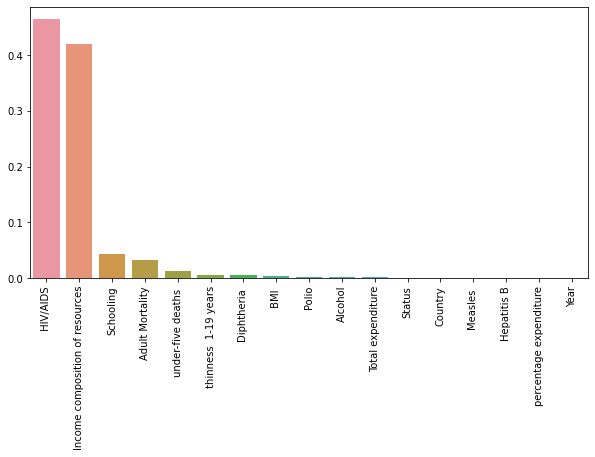

In [ ]:
fig = plt.figure(figsize = (10,5))
weights = list(best_xgb.feature_importances_)

feat_imps = zip(feature_names, weights)

feats ,imps = zip(*(sorted(feat_imps, key = lambda x: x[1], reverse=True)))
ax=sns.barplot(list(feats[:20]), list(imps[:20]))
ax.tick_params(axis='x', rotation=90)

Text(0.5, 0, 'Actual')

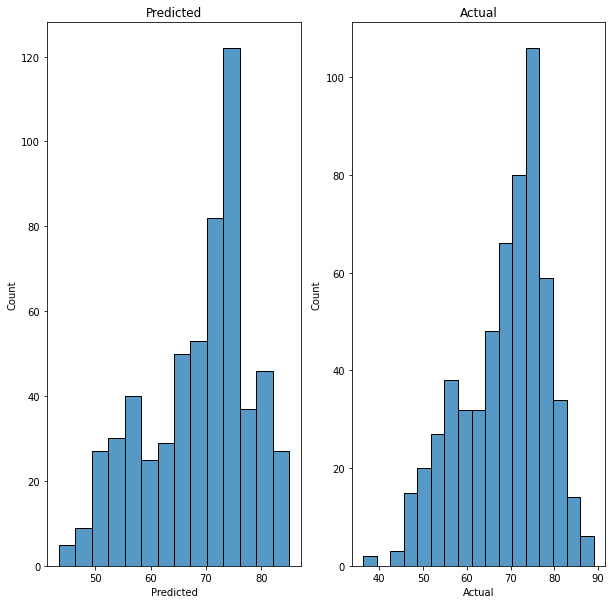

In [ ]:
y_pred = best_xgb.predict(X_test)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.histplot(y_pred)
plt.title("Predicted")
plt.xlabel("Predicted")
plt.subplot(1,2,2)
sns.histplot(y_test)
plt.title("Actual")
plt.xlabel("Actual")